In [355]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import torch.nn.functional as F

this PyTorch CNN Classification model predict chinese number characters. 
```
{
  0: "十",
  1: "一",
  2: "二",
  3: "三",
  4: "四",
  5: "五",
  6: "六",
  7: "七",
  8: "八",
  9: "九",
}
```


tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000,
        0.0000, 0.0118, 0.0000, 0.0078, 0.0510, 0.2196, 0.5098, 0.4000, 0.0118,
        0.0000, 0.0039, 0.0000, 0.0000, 0.0000])
torch.Size([1024])
0.35686275


(array([993.,   8.,   2.,   4.,   4.,   3.,   6.,   2.,   1.,   1.]),
 array([0.        , 0.08156863, 0.16313726, 0.24470589, 0.32627451,
        0.40784314, 0.48941177, 0.57098043, 0.65254903, 0.73411763,
        0.81568629]),
 <BarContainer object of 10 artists>)

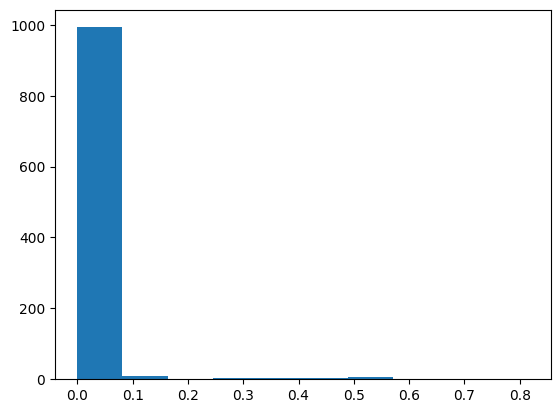

In [436]:
# test
imagePath = os.path.join(os.getcwd()+"/MNIST-CH", "chinese_numbers_v3_0000s_0000_1.jpg")

torchvisionImage = torchvision.io.read_image(imagePath)

floatImage = transforms.ConvertImageDtype(dtype=torch.float32)

t_image = floatImage(torchvisionImage)
print(t_image[0][14])
hisInput = torch.flatten(t_image)
print(hisInput.shape)
np_image = hisInput.numpy()
print(np_image[500])
plt.hist(np_image)

In [473]:
class MNIST_CH_Dataset(torch.utils.data.Dataset):
    def __init__(self,img_dir,images,transforms=None):
        self.img_dir = img_dir
        self.inputs = images
        self.transforms = transforms
    def __len__(self):
        return len(self.inputs)
    def __getitem__(self, idx):
        
        img_path = os.path.join(self.img_dir, self.inputs[idx])
        input = torchvision.io.read_image(img_path)
        if self.transforms:
            input = self.transforms(input)
        # input = input[0]
        target =torch.tensor(int(self.inputs[idx].split('.')[-2][-1] ))
        return input,target

torch.Size([32, 32])


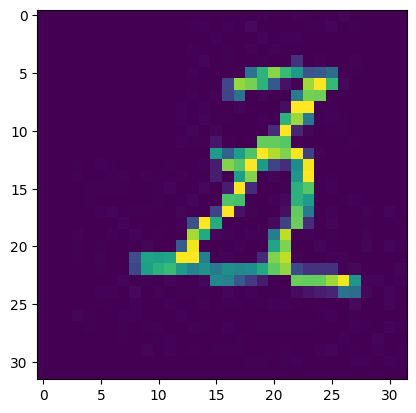

In [474]:
transform_train = transforms.Compose([
                                      transforms.RandomRotation(12),
                                      transforms.RandomCrop(32),
                                      # transforms.RandomHorizontalFlip(p=0.5),
                                      transforms.RandomAffine(0, translate=(0.1, 0.1)),
                                      transforms.ConvertImageDtype(dtype=torch.float32),
                                      ])

imagePath = os.path.join(os.getcwd()+"/MNIST-CH", "chinese_numbers_v3_0000s_0004_5.jpg")
torchvisionImage = torchvision.io.read_image(imagePath)
t_image = transform_train(torchvisionImage)

print(t_image[0].shape)
hisInput = torch.flatten(t_image)
np_image = hisInput.numpy()
# plt.hist(np_image)
plt.imshow(t_image[0])

In [475]:
images = []
testImages =[]

totalImages = os.listdir( os.getcwd()+"/MNIST-CH")

# range(len(colors))
    
for index in range(len(totalImages)):
    image = totalImages[index]
    if image.endswith(".jpg"):
        if index <= 100:
            images.append(image)
        else:
            testImages.append(image)

In [476]:
train_dataset = MNIST_CH_Dataset(img_dir=os.getcwd()+"/MNIST-CH",  images=images, transforms=transform_train )
test_dataset = MNIST_CH_Dataset(img_dir=os.getcwd()+"/MNIST-CH",  images=testImages, transforms=transform_train )
    
           
train_dataloader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=10, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=10, shuffle=False)

# dir(train_dataset)

testInput,target = train_dataset.__getitem__(1)

print(testInput.shape,target)



torch.Size([1, 32, 32]) tensor(2)


In [544]:
model = nn.Sequential(
    nn.Linear(1024, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
print(model)
testTensor = torch.rand(1,64,64)


Sequential(
  (0): Linear(in_features=1024, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)


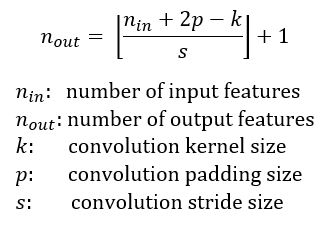

In [545]:
n_epochs = 100
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)
for it in range(n_epochs):
  train_loss = []
  for inputs, targets in train_dataloader:
    # reshape the input
    inputs = inputs.view(-1, 1024)
    # zero the parameter gradients
    # print(inputs.shape)
    optimizer.zero_grad()
    outputs = model(inputs)
  
    loss = criterion(outputs, targets)
      
    # Backward and optimize
    loss.backward()
    optimizer.step()

    train_loss.append(loss.item())
    
    test_loss = []
    for inputs, targets in test_dataloader:
        inputs = inputs.view(-1, 1024)
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss.append(loss.item())
    test_loss = np.mean(test_loss)

    
  train_loss = np.mean(train_loss) # a little misleading
  train_losses[it] = train_loss
  test_losses[it] = test_loss
  if (it + 1) % 10 == 0:
    print(f'Epoch {it+1}/{n_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')
  if it == 0:
    print(inputs.shape)
    

torch.Size([10, 1024])
Epoch 10/100, Train Loss: 1.3216, Test Loss: 1.4978
Epoch 20/100, Train Loss: 0.9370, Test Loss: 1.3399
Epoch 30/100, Train Loss: 0.7879, Test Loss: 1.1001
Epoch 40/100, Train Loss: 0.6006, Test Loss: 1.1226
Epoch 50/100, Train Loss: 0.4503, Test Loss: 0.7006
Epoch 60/100, Train Loss: 0.4307, Test Loss: 0.3612
Epoch 70/100, Train Loss: 0.3504, Test Loss: 0.6466
Epoch 80/100, Train Loss: 0.2613, Test Loss: 0.3250
Epoch 90/100, Train Loss: 0.3105, Test Loss: 0.6082
Epoch 100/100, Train Loss: 0.2249, Test Loss: 0.4762


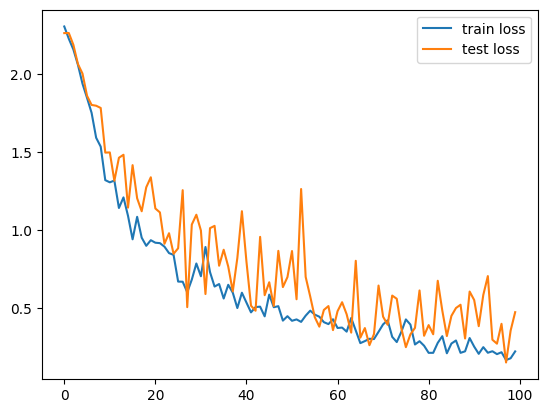

In [546]:
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [547]:
# accuracy
model.eval()

n_correct = 0.
n_total = 0.
for inputs, targets in train_dataloader:
  inputs = inputs.view(-1, 1024)
  outputs = model(inputs)
  # Get prediction
  _, predictions = torch.max(outputs, 1)
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]
train_acc = n_correct / n_total

n_correct = 0.
n_total = 0.
for inputs, targets in test_dataloader:
  inputs = inputs.view(-1, 1024)
  outputs = model(inputs)
  _, predictions = torch.max(outputs, 1)
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]
test_acc = n_correct / n_total
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")


Train acc: 0.9500, Test acc: 0.9000


Result: 2


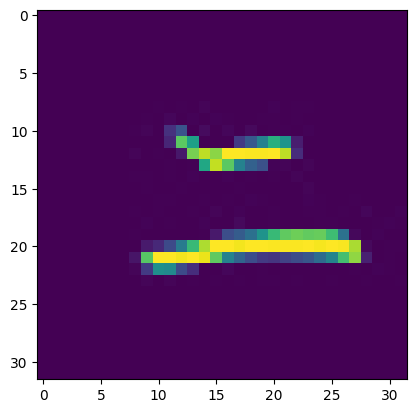

In [554]:
model.eval()
torch.set_printoptions(linewidth=200)

index = random.randrange(20)
test_image_path = os.path.join(os.getcwd()+"/MNIST-CH", testImages[index])

# input = torchvision.io.read_image(test_image_path)

# # floatImage = transforms.ConvertImageDtype(dtype=torch.float32)
# t_image = transform_train(input)    

# print(test_image_path)

# predition = model(t_image)

result_Image = torchvision.io.read_image(test_image_path)
result_input = transform_train(result_Image)    
# result_input = torch.tensor(result_input)
result_input = result_input.view(-1, 1024)
# result_input = result_input[None,:, :, :]

# print(result_input.shape)
# print(model)
output = model(result_input)

_, predictions = torch.max(output, 1)
result = predictions.item()
# print(output,result)

print(f"Result: {result}")
plt.imshow(result_Image[0])


